In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(20,10)})
#from sklearn import datasets
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pandas_profiling as pp

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [0]:
data = pd.read_csv("census.csv", delimiter=",")

In [0]:
#report = pp.ProfileReport(data)
#report.to_file('data_assessment.html')
#report

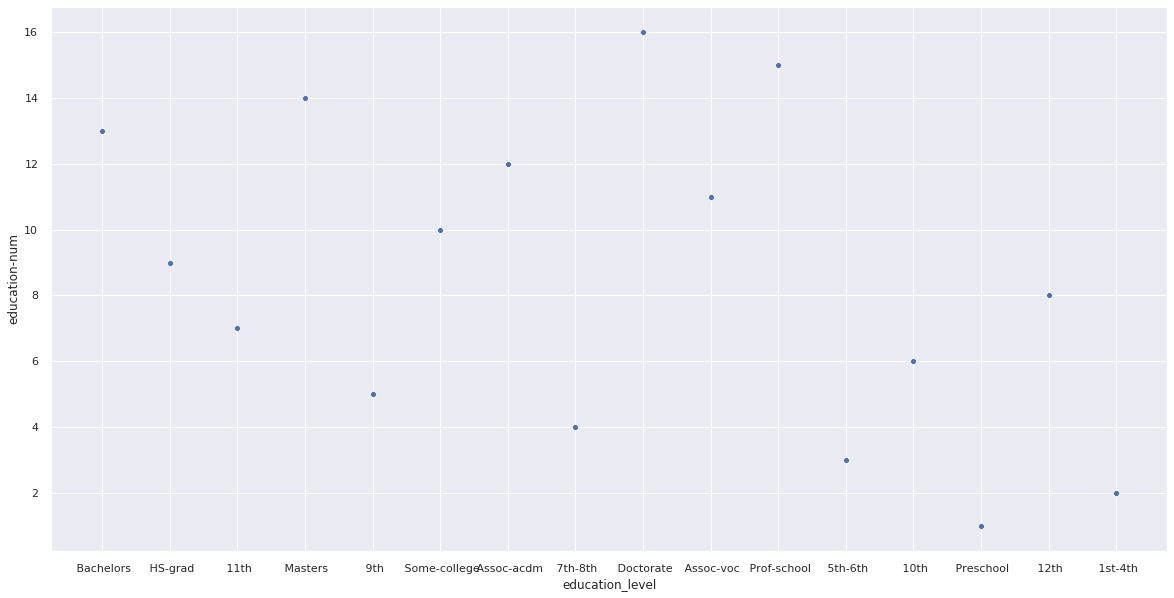

In [0]:
sns.scatterplot(x="education_level", y = "education-num", data = data)

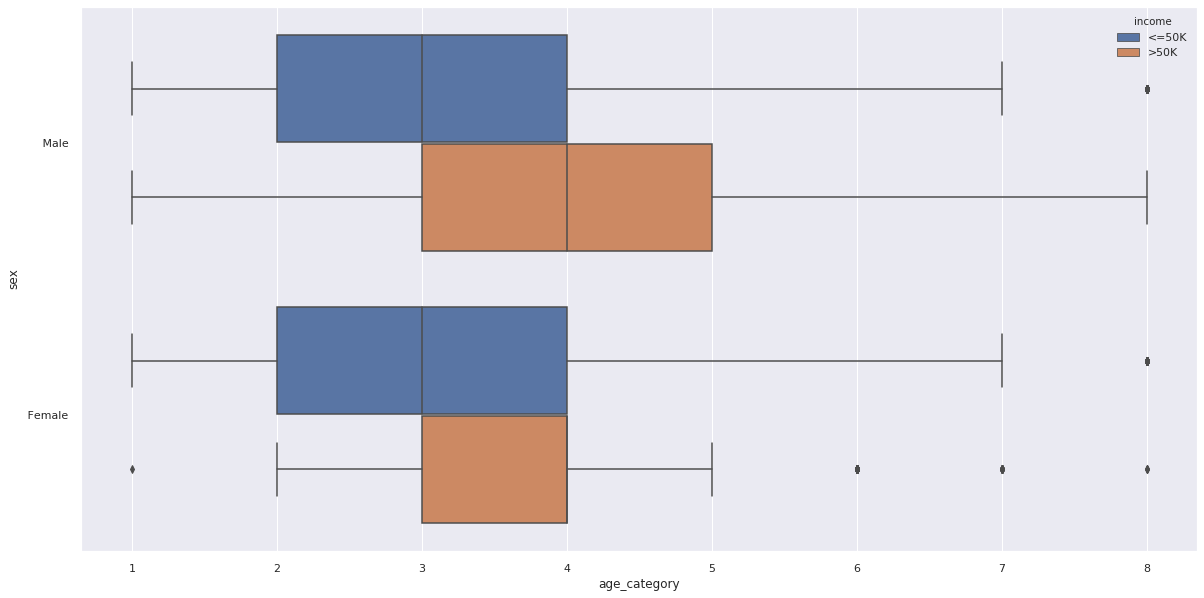

In [0]:
# drop capital gain and loss almost 90% zeros
data = data.drop(columns=['capital-gain', 'capital-loss','education_level'])
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
#age_group = ['10-20','20-30','30-40','40-50','50-60', '60-70','70-80','80-90']
age_group=[1,2,3,4,5,6,7,8]
age_categories = pd.cut(data['age'], bins, labels=age_group)
#print(age_categories.head(), data['age'])
data['age_category'] = age_categories
sns.boxplot(x="age_category", y = "sex", hue="income", data = data)

In [0]:
target = "income"
cat_names = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'age_category'] 
cont_names = ['education-num', 'hours-per-week']
df_cat = pd.get_dummies(data[cat_names].astype(str))
df_cont = data[cont_names]
X = pd.concat([df_cat, df_cont], axis = 1)
y = data['income'] == '>50K'
X.shape

(45222, 92)

In [0]:
estimator = xgb.XGBClassifier()
selector = RFE(estimator, 60, step=1)
selector = selector.fit(X, y)
selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       30,  1,  1, 15,  1,  1, 21, 23, 25, 27,  1, 33, 32,  1,  1, 11, 12,
       10,  1,  1,  1,  4,  1,  1,  1,  1, 13, 14, 16, 17,  8,  9,  1, 22,
       18, 26, 19, 29, 31,  1,  5, 28, 24, 20,  7,  1,  2,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [0]:
def feat_func():
  select_feat = pd.DataFrame()
  select_feat['feature'] = X.columns
  select_feat['rank'] = selector.ranking_
  select_feat.head()
  feat = select_feat[select_feat['rank'] == 1]['feature']
  feat = feat.tolist()


In [0]:
# XGBoost with RFE
feat_func()
X_Xgboost = X[feat]

(45222, 92)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_Xgboost, y, test_size = 0.4, random_state = 42)

In [0]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = metrics.recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))
precision = metrics.precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 83.75%
Recall: 56.12%
Precision: 71.71%


In [0]:
# Random Forest with RFE
estimator = RandomForestClassifier()
selector = RFE(estimator, 60, step=1)
selector = selector.fit(X, y)
selector.ranking_

array([ 1,  1,  1,  1,  1,  1, 20,  1, 14,  1,  1,  1,  1,  1,  1, 27,  1,
        1,  1,  1,  1,  1, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  9,  1,  1, 10,  1, 19, 17, 15,  1,  8,
        1,  1, 24, 22, 33, 31, 26, 18,  1,  5,  7,  1,  6,  1, 30,  1, 23,
       32, 21,  1,  2,  4,  1, 28,  3, 11, 29, 25,  1, 12, 13,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [0]:
feat_func()
X_RF = X[feat]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_RF, y, test_size = 0.4, random_state = 42)

In [0]:
model = RandomForestClassifier(max_depth=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = metrics.recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))
precision = metrics.precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 81.24%
Recall: 56.14%
Precision: 63.45%
